# Introduction to Convolutional Neural Networks, part 2

In [part 1](16_CNNs_part1.ipynb) of this section, we loaded the ASL data, visualized some sample images, normalized the data, and created and trained a model. That model had three layed, the first two had 512 neurons and the last had 25 and used the softmax activation function to generate a prediction that was the probablity that an image belonged to each of the 25 categories.

With that model, we achieved an accuract of about 80%.

## Reload and pre-process our data as in part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

import helpers_cnns # Some helper functions for the CNN notebooks.

In [2]:
# Load the data
sign_train = pd.read_csv("data/sign_mnist/sign_mnist_train.csv")
sign_test = pd.read_csv("data/sign_mnist/sign_mnist_test.csv")

# Prepare X and y
y_train = sign_train['label']
X_train = sign_train.drop(columns='label').values

y_test = sign_test['label']
X_test = sign_test.drop(columns='label').values

# Normalize the data
X_train = X_train/255
X_test = X_test/255

# Convert our classes to categorical
num_classes = 25 # Not entirely sure what the 25th category is...

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Add Convolutional kernels

In part 1, we treated the image data as a row of 784 pixels. But our images are 28 rows of 28 pixels (a matrix of pixels). There is information in that spacial arrangement that is lost by simplifying the data into a row. 

Most computer vision tasks work best with the images in that matrix format. So, let's transform the data into the 28X28 shape.

### Reshape our data into a 28X28 matrix per image

In [43]:
print(f'Shape before: {X_train.shape}')
X_train = X_train.reshape(-1,28,28,1)
X_test= X_test.reshape(-1,28,28,1)

print(f'Shape after: {X_train.shape}')

Shape before: (27455, 784)
Shape after: (27455, 28, 28, 1)


In [ ]:
### Convolutional kernels



In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)         

In [47]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [48]:
history = model.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20


2022-03-01 12:12:26.130802: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2022-03-01 12:12:27.124812: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Running ptxas --version returned 32512
2022-03-01 12:12:27.247994: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


858/858 [==============================] - 8s 5ms/step - loss: 0.3047 - accuracy: 0.9073 - val_loss: 0.2710 - val_accuracy: 0.9243
Epoch 2/20
858/858 [==============================] - 4s 4ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.3140 - val_accuracy: 0.9108
Epoch 3/20
858/858 [==============================] - 3s 3ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.3248 - val_accuracy: 0.9272
Epoch 4/20
858/858 [==============================] - 3s 3ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.3286 - val_accuracy: 0.9276
Epoch 5/20
858/858 [==============================] - 3s 3ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.2982 - val_accuracy: 0.9554
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.3993 - val_accuracy: 0.9314
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.2469 - val_accuracy: 0.9580
Epoch 8/20
858/85

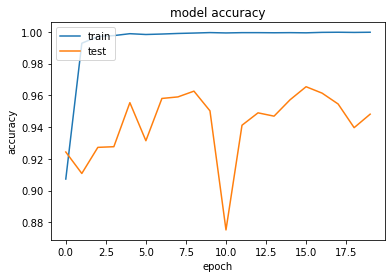

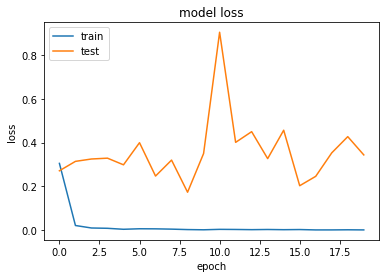

In [50]:
plot_history(history)

In [53]:
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

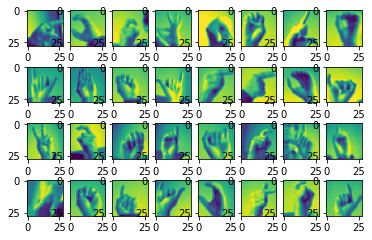

In [55]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(X_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [57]:
datagen.fit(X_train)

In [59]:
history= model.fit(img_iter,
          epochs=20,
          steps_per_epoch=len(X_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(X_test, y_test))

Epoch 1/20
857/857 [==============================] - 8s 8ms/step - loss: 1.3079 - accuracy: 0.7510 - val_loss: 0.1952 - val_accuracy: 0.9393
Epoch 2/20
857/857 [==============================] - 7s 8ms/step - loss: 0.3523 - accuracy: 0.8890 - val_loss: 0.2266 - val_accuracy: 0.9304
Epoch 3/20
857/857 [==============================] - 8s 9ms/step - loss: 0.2295 - accuracy: 0.9290 - val_loss: 0.0690 - val_accuracy: 0.9792
Epoch 4/20
857/857 [==============================] - 7s 8ms/step - loss: 0.1823 - accuracy: 0.9428 - val_loss: 0.0446 - val_accuracy: 0.9831
Epoch 5/20
857/857 [==============================] - 7s 8ms/step - loss: 0.1533 - accuracy: 0.9539 - val_loss: 0.0582 - val_accuracy: 0.9844
Epoch 6/20
857/857 [==============================] - 7s 8ms/step - loss: 0.1374 - accuracy: 0.9589 - val_loss: 0.3400 - val_accuracy: 0.9151
Epoch 7/20
857/857 [==============================] - 8s 9ms/step - loss: 0.1132 - accuracy: 0.9653 - val_loss: 0.0251 - val_accuracy: 0.9911
Epoch 

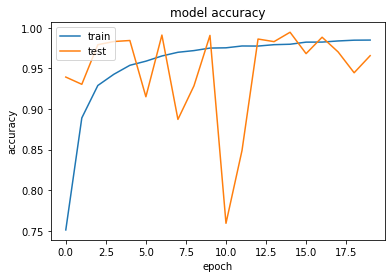

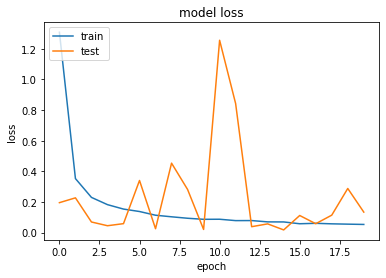

In [60]:
plot_history(history)

In [74]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

alphabet = "abcdefghiklmnopqrstuvwxy"
dictionary = {}
for i in range(24):
    dictionary[i] = alphabet[i]
dictionary

def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1) 
    image = image/255
    prediction = model.predict(image)
    print(prediction)
    # convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    return predicted_letter

[[2.1738622e-19 9.9999905e-01 3.6405507e-25 2.5553067e-19 2.5384486e-20
  1.1784752e-16 1.0448094e-36 4.5781791e-28 4.1740426e-16 6.9588432e-22
  1.9188263e-22 7.3801212e-22 8.7375961e-24 5.8782487e-29 1.3415618e-36
  6.0829291e-25 1.7333849e-27 3.7621695e-23 7.6258973e-31 0.0000000e+00
  9.2726145e-07 2.0555512e-26 4.9935889e-12 3.1810881e-27 7.6844581e-28]]


'b'

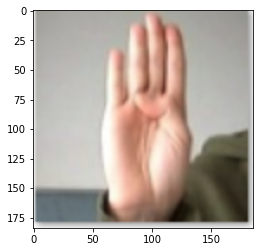

In [79]:
predict_letter("data/b.png")

[[9.3107100e-16 8.9965796e-01 1.3572973e-22 2.7151620e-21 8.7113056e-16
  2.7634613e-19 7.8065207e-26 8.9615216e-20 1.1334485e-10 1.6012763e-08
  4.3491917e-05 1.2496164e-26 6.0753225e-10 1.3348984e-08 7.2966705e-15
  5.8546907e-04 2.4057534e-09 1.1030461e-06 4.0427346e-09 2.2110352e-28
  9.8010324e-02 5.6767403e-14 1.7015332e-03 1.6115436e-12 3.2546201e-15]]


'b'

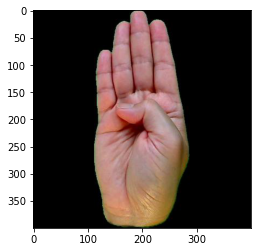

In [81]:
predict_letter('data/asl_dataset/b/hand2_b_bot_seg_2_cropped.jpeg')

[[2.9474078e-16 8.8409393e-12 4.6214885e-09 5.6160515e-24 1.2640814e-16
  3.1001699e-21 1.2515883e-21 7.0450402e-11 2.0984230e-22 3.9091473e-11
  3.1481728e-14 7.3735899e-28 5.1433406e-11 1.8892407e-15 2.2597275e-08
  9.9990249e-01 9.7532298e-05 2.0647596e-18 2.4790109e-11 2.6672529e-25
  5.3792704e-10 4.2445958e-29 4.6576862e-22 1.2054073e-10 8.7307665e-29]]


'q'

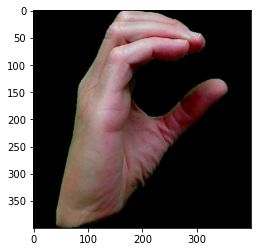

In [82]:
predict_letter('data/asl_dataset/c/hand1_c_dif_seg_2_cropped.jpeg')